import necessary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

Load and merge datasets

In [2]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-white.csv', sep=';')

# Store wine type as an attribute
red_wine['wine_type'] =  'red'
white_wine['wine_type'] = 'white'
# Bucket wine quantity scores into qualitatuve quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value : 'low' if value <=5 else 'medium' if value <=7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' if value <=5 else 'medium' if value <=7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])

# Merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])
# Re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

Understand dataset features and values

In [3]:
print(white_wine.shape, red_wine.shape)
print(wines.info)

(4898, 14) (4898, 14)
<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.0              0.34         0.66           15.90      0.046   
1               7.3              0.24         0.39           17.95      0.057   
2               7.3              0.28         0.36           12.70      0.040   
3               6.5              0.20         0.31            2.10      0.033   
4               6.3              0.26         0.21            4.00      0.030   
...             ...               ...          ...             ...        ...   
9791            7.3              0.25         0.36            2.10      0.034   
9792            6.2              0.28         0.22            7.30      0.041   
9793            7.8              0.19         0.26            8.90      0.039   
9794            8.1              0.27         0.35            1.70      0.030   
9795            6.0              0.33         0.18     

In [4]:
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.0              0.34         0.66           15.90      0.046   
1            7.3              0.24         0.39           17.95      0.057   
2            7.3              0.28         0.36           12.70      0.040   
3            6.5              0.20         0.31            2.10      0.033   
4            6.3              0.26         0.21            4.00      0.030   

   free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
0                 26.0                 164.0  0.997900  3.14       0.50   
1                 45.0                 149.0  0.999900  3.21       0.36   
2                 38.0                 140.0  0.998000  3.30       0.79   
3                 32.0                  95.0  0.989435  2.96       0.61   
4                 24.0                 125.0  0.991500  3.06       0.34   

   alcohol  quality wine_type quality_label  
0      8.8        6       red        medium  
1      8.6        5       red           low  
2      9.6        6     white        medium  
3     12.0        6     white        medium  
4     10.7        6       red        medium

Understanding Wine and Types
</be></br>Wine is an alcoholic beverage made from grapes which is fermented without the addition of sugars, acids, enzymes, water, or other nutrients

</br>Red wine is made from dark red and black grapes. The color usually ranges from various shades of red, brown and violet. This is produced with whole grapes including the skin which adds to the color and flavor of red wines, giving it a rich flavor.

</br>White wine is made from white grapes with no skins or seeds. The color is usually straw-yellow, yellow-green, or yellow-gold. Most white wines have a light and fruity flavor as compared to richer red wines.

</br>Understanding Wine Attributes and Properties
fixed acidity: Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). This variable is usually expressed in the dataset.

</br>volatile acidity: These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine.

</br>citric acid: This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness.

</br>residual sugar: This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped.

</br>chlorides: This is usually a major contributor to saltiness in wine.

</br>free sulfur dioxide: This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour.

</br>Total sulfur dioxide: This is the sum total of the bound and the free sulfur dioxide (). This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.

</br>density: This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol.

</br>pH: Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

</br>sulphates: These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor.

</br>alcohol: Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence it is not a surprise for this attribute to be a part of this dataset. It's usually measured in % vol or alcohol by volume (ABV).

</br>quality: Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

</br>wine_type: Since we originally had two datasets for red and white wine, we introduced this attribute in the final merged dataset which indicates the type of wine for each data point. A wine can either be a 'red' or a 'white' wine. One of the predictive models we will build in this chapter would be such that we can predict the type of wine by looking at other wine attributes.

</br>quality_label: This is a derived attribute from the quality attribute. We bucket or group wine quality scores into three qualitative buckets namely low, medium and high. Wines with a quality score of 3, 4 & 5 are low quality, scores of 6 & 7 are medium quality and scores of 8 & 9 are high quality wines. We will also build another model in this chapter to predict this wine quality label based on other wine attributes.

<h3>Exploratory Data Analysis and Visualizations</h3>
</br>Descriptive Statisctics

In [5]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(), 2)
ws = round(white_wine[subset_attributes].describe(), 2)
pd.concat([rs, ws], axis=1, keys=['Red wine Statitics', 'White Wine Statistics'])

Red wine Statitics                                          \
          residual sugar total sulfur dioxide sulphates  alcohol   
count            4898.00              4898.00   4898.00  4898.00   
mean                6.39               138.36      0.49    10.51   
std                 5.07                42.50      0.11     1.23   
min                 0.60                 9.00      0.22     8.00   
25%                 1.70               108.00      0.41     9.50   
50%                 5.20               134.00      0.47    10.40   
75%                 9.90               167.00      0.55    11.40   
max                65.80               440.00      1.08    14.20   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          4898.00  4898.00               4898.00              4898.00   
mean              0.28     5.88                  6.39               138.36   
std               0.10     0.89                  5.07                42.50   
min               0.08     3.00                  0.60                 9.00   
25%               0.21     5.00                  1.70               108.00   
50%               0.26     6.00                  5.20               134.00   
75%               0.32     6.00                  9.90               167.00   
max               1.10     9.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [6]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(), 2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(), 2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(), 2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                    Medium Quality Wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          3280.00          3280.00  3280.00  3280.00             6156.00   
mean              9.85             0.31     3.17     4.88               10.80   
std               0.88             0.11     0.14     0.36                1.23   
min               8.00             0.10     2.79     3.00                8.50   
25%               9.20             0.24     3.08     5.00                9.80   
50%               9.60             0.29     3.16     5.00               10.80   
75%              10.40             0.35     3.24     5.00               11.80   
max              13.60             1.10     3.79     5.00               14.20   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          6156.00  6156.00  6156.00            360.00           360.00   
mean              0.26     3.20     6.29             11.65             0.28   
std               0.09     0.15     0.45              1.27             0.11   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.20     3.09     6.00             11.00             0.20   
50%               0.25     3.19     6.00             12.00             0.26   
75%               0.31     3.29     7.00             12.60             0.33   
max               0.96     3.82     7.00             14.00             0.66   

                       
           pH quality  
count  360.00  360.00  
mean     3.22    8.03  
std      0.15    0.16  
min      2.94    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.59    9.00

Infernetial Statistics

In [7]:
from scipy import stats
# scipy.stats.f_oneway(*args)[source] Performs a 1-way ANOVA. The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.
F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'], 
                      wines[wines['quality_label'] == 'medium']['alcohol'], 
                      wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['pH'], 
                      wines[wines['quality_label'] == 'medium']['pH'], 
                      wines[wines['quality_label'] == 'high']['pH'])
print('\nANOVA test for mean pH levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 956.6188362322738 	p-value: 0.0

ANOVA test for mean pH levels across wine samples with different quality ratings
F Statistic: 39.39395991187984 	p-value: 9.117499715376718e-18


Text(0, 0.5, 'Wine pH')

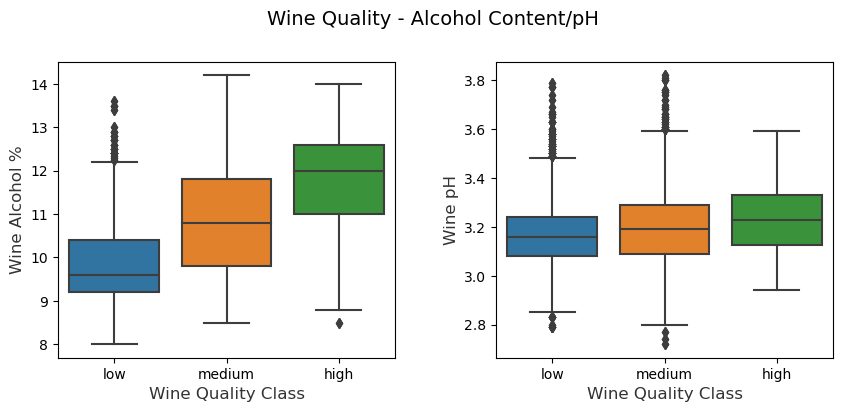

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('Wine Quality - Alcohol Content/pH', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x="quality_label", y="alcohol", data=wines, ax=ax1)
ax1.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="pH", data=wines, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine pH",size = 12,alpha=0.8)

Univariate Analysis

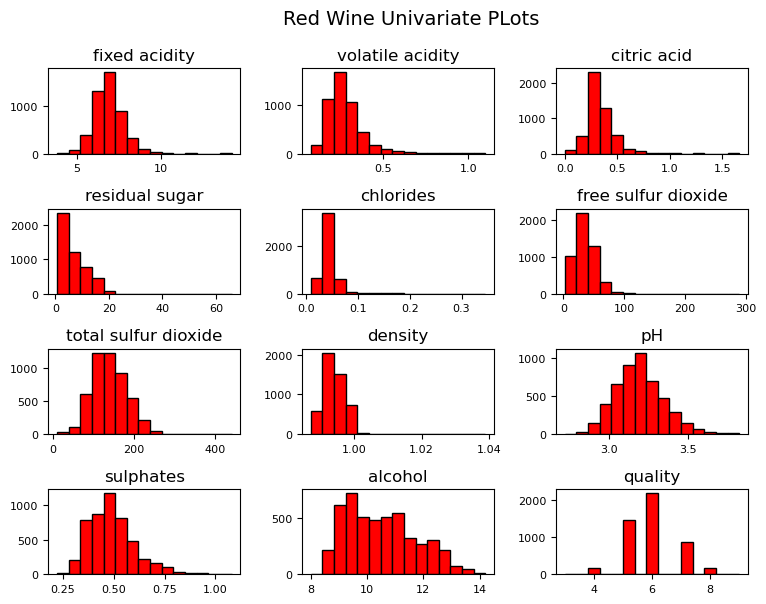

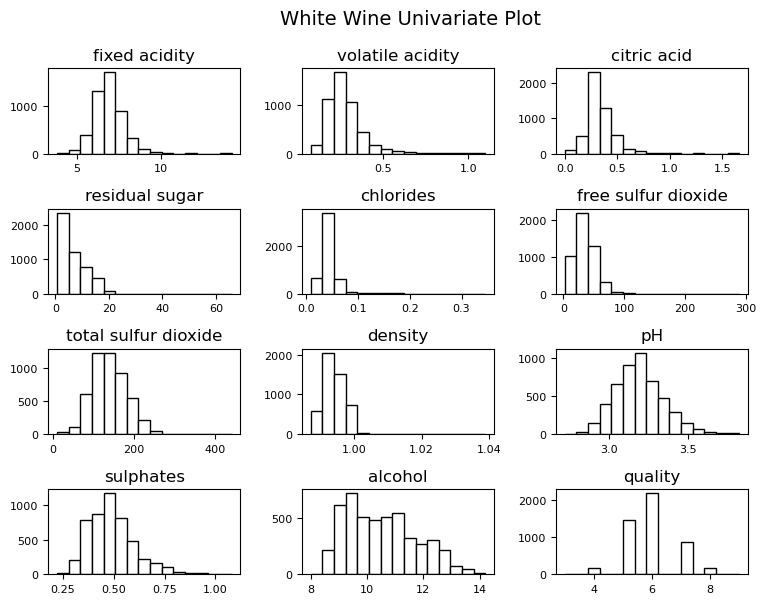

In [9]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
rt = plt.suptitle('Red Wine Univariate PLots', x=0.65, y=1.25, fontsize=14)

white_wine.hist(bins=15, color='white', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
wt = plt.suptitle('White Wine Univariate Plot', x=0.65, y=1.25, fontsize=14)

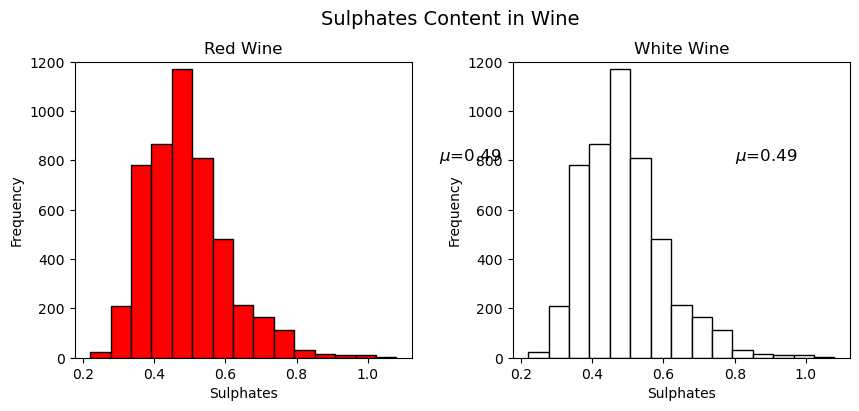

In [10]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15, edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='white', bins=15, edgecolor='black', linewidth=1)

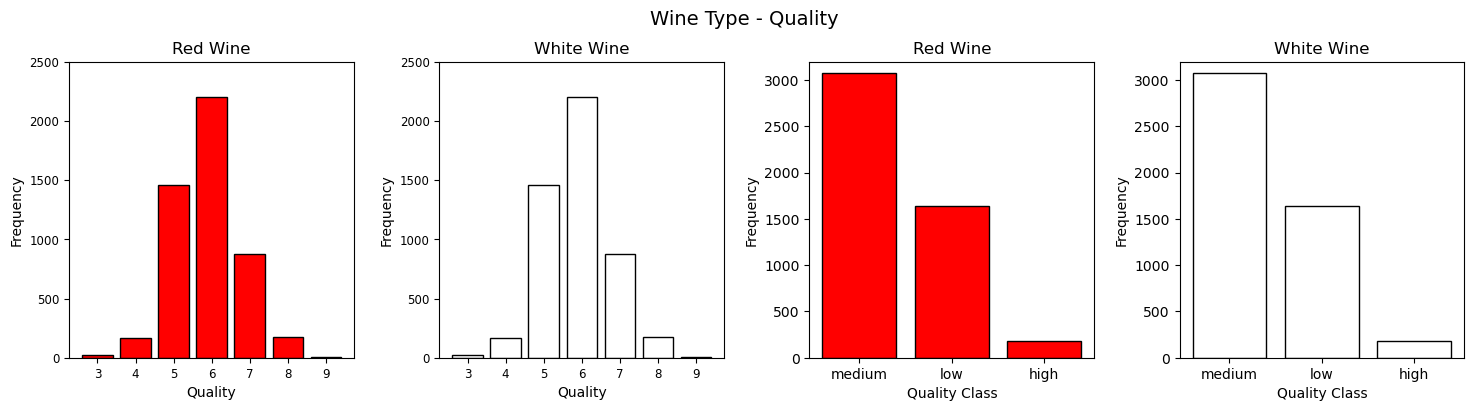

In [11]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency")
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
        edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,4, 3)
ax3.set_title("Red Wine")
ax3.set_xlabel("Quality Class")
ax3.set_ylabel("Frequency") 
rw_q = red_wine['quality_label'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', 
        edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_title("White Wine")
ax4.set_xlabel("Quality Class")
ax4.set_ylabel("Frequency") 
ww_q = white_wine['quality_label'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', 
        edgecolor='black', linewidth=1, tick_label =ww_q[0])

Multivariate Analysis

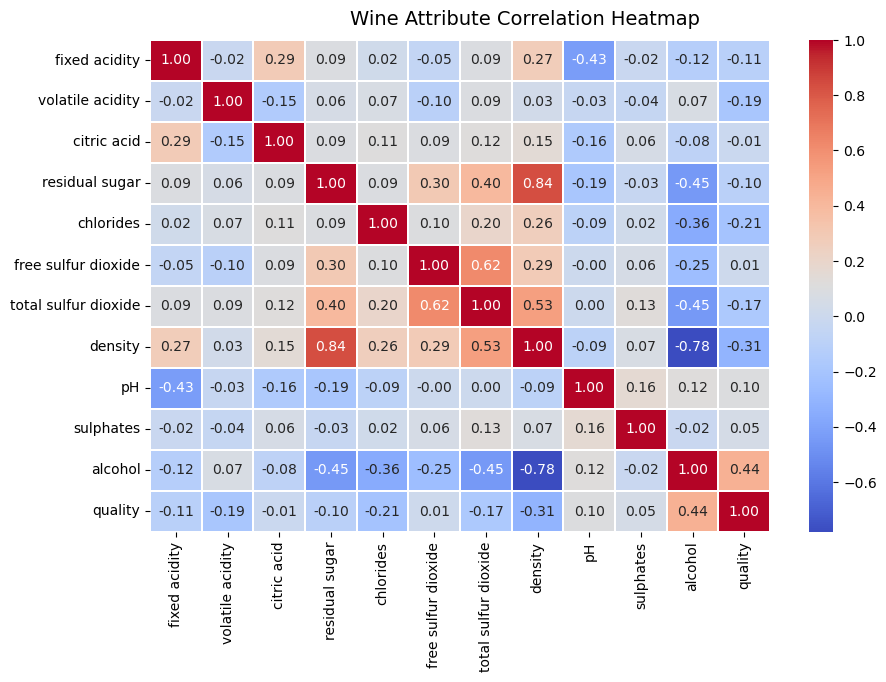

In [12]:
f, ax = plt.subplots(figsize=(10,6))
corr = wines.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Wine Attribute Correlation Heatmap', fontsize=14)

/home/neel/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


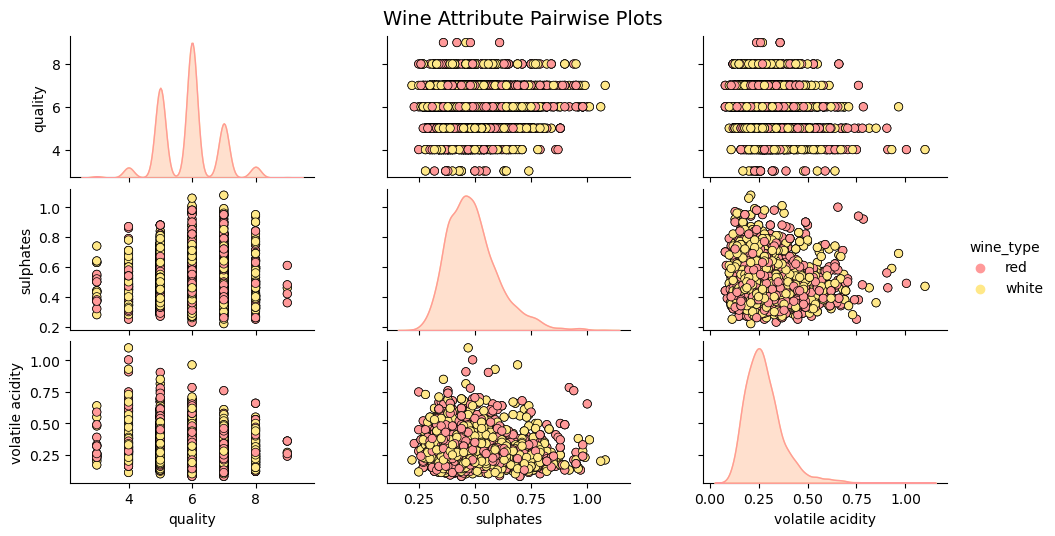

In [13]:
cols = ['wine_type', 'quality', 'sulphates', 'volatile acidity']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, palette={"red": "#FF9999", "white": "#FFE888"}, plot_kws=dict(edgecolor="black", linewidth=0.5))

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attribute Pairwise Plots', fontsize=14)

/home/neel/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/neel/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


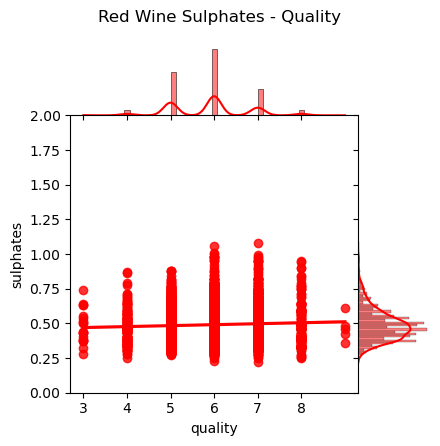

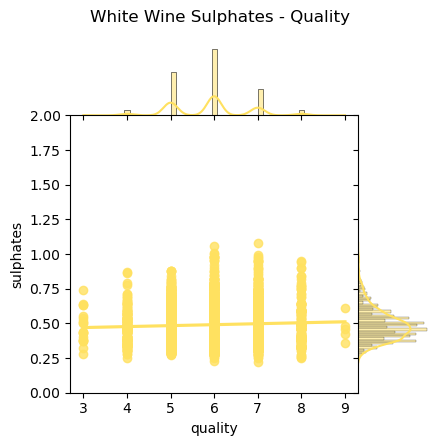

In [14]:
rj = sns.jointplot(x='quality', y='sulphates', data=red_wine, kind='reg', ylim=(0, 2), color='red', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(3, 9)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Red Wine Sulphates - Quality', fontsize=12)

wj = sns.jointplot(x='quality', y='sulphates', data=white_wine, kind='reg', ylim=(0, 2), color='#FFE160', space=0, size=4.5, ratio=4)
wj.ax_joint.set_xticks(list(range(3,10)))
fig = wj.fig 
fig.subplots_adjust(top=0.9)
t = fig.suptitle('White Wine Sulphates - Quality', fontsize=12)

/home/neel/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


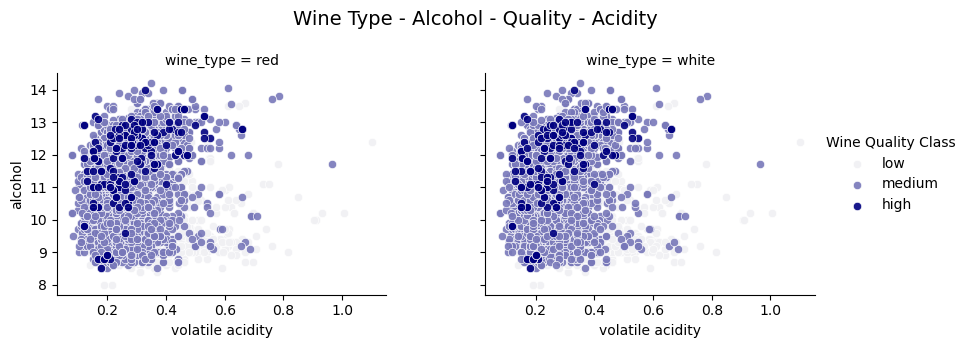

In [15]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 3))
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, 
      edgecolor='white', linewidth=0.5)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

volatile acidity as
well as total sulfur dioxide is considerably lower in high quality
wine samples. Also, total sulfur dioxide is considerable more in
white wine samples as compared to red wine samples. However, volatile
acidity levels are slightly lower in white wine samples as compared to red
wine samples we also observed in the previous plot.

/home/neel/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


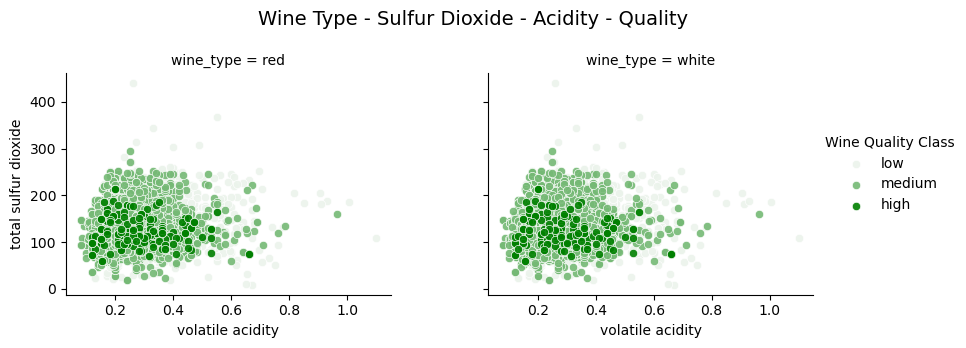

In [16]:
g = sns.FacetGrid(wines, col='wine_type', hue='quality_label', col_order=['red', 'white'], hue_order=['low', 'medium', 'high'], aspect=1.2, size=3.5, palette=sns.light_palette('green', 3))
g.map(plt.scatter, "volatile acidity", 'total sulfur dioxide', alpha=0.9, edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

Not only are
we able to successfully visualize four variables, but also we can see
meaningful relationships among them. Higher quality wine samples
(depicted by darker shades) have lower levels of volatile acidity and higher
levels of alcohol content as compared to wine samples with medium and
low ratings. Besides this, we can also see that volatile acidity levels are
slightly lower in white wine samples as compared to red wine samples.
Letâ€™s now build a similar visualization . However, in this scenario, we
want to analyze patterns in wine types, quality, sulfur dioxide,
and acidity levels. We can use the same framework as our last code
snippet to achieve this.

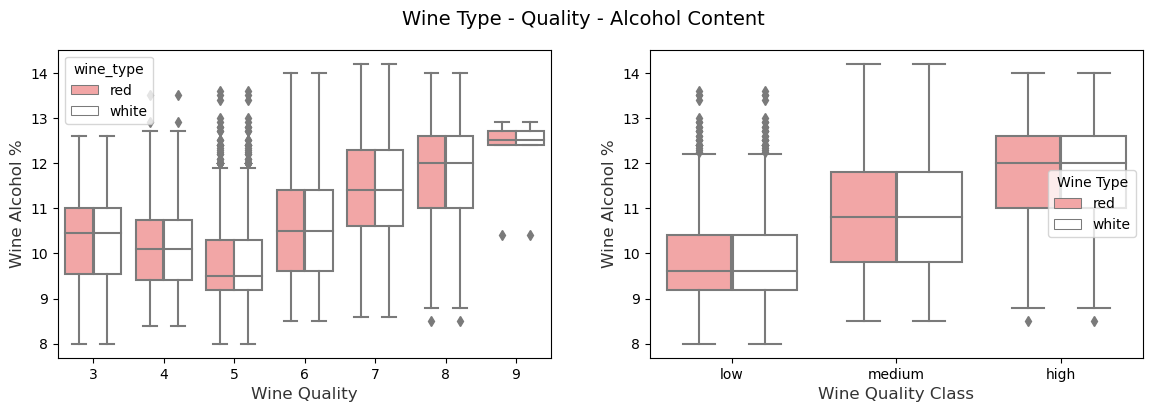

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

We can clearly observe the
wine alcohol by volume distribution has an increasing trend based on higher
quality rated wine samples.

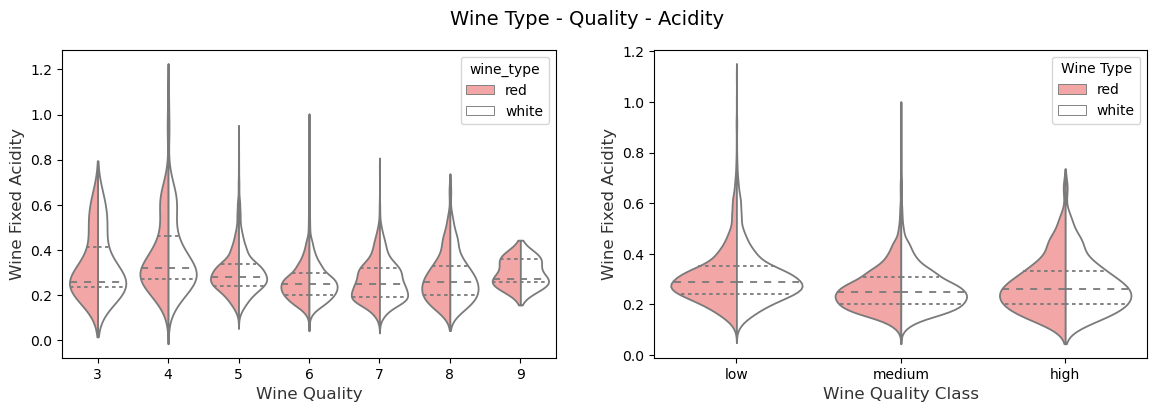

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality_label", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Fixed Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

It
is quite evident that red wine samples have higher acidity as compared to its
white wine counterparts. Also we can see an overall decrease in acidity with
higher quality wine for red wine samples but not so much for white wine
samples.